# Overview

Suppose an engineer needs to investigate the effects of the "Power" on the "Etch Rate" in the design of electronics. The objective of such experiment is to model the relationship between "Etch Rate" and "Power", and to specify the power setting that will provide a desired target "Etch Rate".

1. `4`-levels of the RF power: `160`W, `180`W, `200`W, and `220`W.
2. `5` wafers at each level of the RF power.
3. Single-variable experiment with $a = 4$ levels of the variable.
4. $n = 5$ replicates.
5. Each of the `20` runs would be made in a random order (in order to prevent unknown nuisance variables from contaminating the results).

For the experiment, we can use boxplot to graphically compare the results, as it shows the standard quantiles and outliers.

<img src="https://www.spcforexcel.com/files/images/boxplotanova.png" width="350" height="auto" />

(Source: [spcforexcel.com, 2008](https://www.spcforexcel.com/knowledge/root-cause-analysis/single-factor-anova))

We can see that the height of the box captures the centre `50%` of the distribution. From the relative position of the boxes across different power settings, there is evidence to suspect that (a) RF power setting affects the Etch Rate and (b) higher power settings result in higher etch rate.

<img src="https://i.stack.imgur.com/9an95.jpg" width="350" height="auto" />

(Source: [@N Brouwer, 2014 - _Example of overlapping boxplots_](https://stackoverflow.com/questions/25295602/boxplot-width-in-ggplot-with-cross-classified-groups))

However, not all experiment results are as clear as this, as in many experiments, boxplots may overlap and it will be very hard to discern if the $X$ variable affects target variable $Y$. 

Hence, one way to scientifically decide on this is to apply the statistical procedure Analysis of Variance (ANOVA).

## ANOVA

For each observation, it is assumed that the output variable $y_{ij}$ is generated based on the linear model where,

$y_{ij} = \mu + \tau_i + \epsilon_{ij}\ \ \forall i \in [1,a], \forall j \in [1,,n]$

- $y_{ij}$: The observed value of the target variable $y$, in the specified treatment & run.
- $\mu$: Overall mean level of $y$, regardless of treatment, and no random error involved.
- $\tau_i$: Effect on y due to the $i$-th treatment (aka Effect on $y$ due to the $i$-th treatment (or treatment effect). This can be obtained from $\mu - \bar{y}_i$.
- $\epsilon_{ij}$: Random error component that incorporates all other sources of variability in the experiment. It is convenient and common to assume $\epsilon_{ij} \sim N(0, \sigma^2)$.
- $i$: The specific treatment applied.
- $j$: The specific run (replicated) applied.
- $a$: Total number of treatment levels.
- $n$: Total number of replicates for each treatment.

The linear model shows how variables and random errors are combined to affect the outcome, which main purpose is to check if the "magnitude" of the treatment effects is much bigger than the "magnitude" of random errors.

The experiment is required to be performed in random order so that the environmental differences in which the treatments are applied (often called the experimental units) are as uniform as possible across units or bias randomised away, thus making the experimental design is a completely randomised design.

For hypothesis testing, the model errors are commonly assumed to be normal and independently distributed random variables with mean $\mu = 0$ and constant standard deviation $\sigma$ at any levels of the variable, implying that $y_{ij}$ follows the normal distribution:

$y_{ij} \sim N(\mu + \tau_i , \sigma^2)$

### Interpretations

<img src="ANOVA.png" width="600" height="auto" />

(Source: [Montgomery, D. C., Custer, L. & McCarville, D. R., 2013, "Design and analysis of experiments: Student solutions manual (8th ed.).", Hoboken, NJ: John Wiley & Sons](https://www.amazon.com/Student-Solutions-Manual-Analysis-Experiments/dp/1118388194))

In the above diagram,

In $SS_{Treatments}$, (or sum-of-squared errors for treatments), each treatment mean deducts the overall mean, and in $SS_{E}$, each observation deducts its treatment mean.

The total can be summed as $SS_T = SS_{Treatments} + SS_{E}$, which represents the overall variability of the data observed and this is the standard "variance" formula that compares data points against the overall mean.

<img src="https://www.itl.nist.gov/div898/handbook/eda/section3/gif/fpdftb.gif" width="300" height="auto" />

(Source: [itl.nist.gov, n.d.](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3673.htm))

The F-value produces the probabilities with regards to the null hypothesis.

#### Fixed Effects Model

The $a$ treatments are specifically chosen by the experimenter. We want to test hypothesis about the treatment means and conclusions will apply only to the variable levels considered in the analysis and not to other treatment levels.

> Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$

_For example, we want to know how reading duration impacts reading scores for students enrolled in all 3 schools (A, B, C) and they are the only ones we are interested in. Even if we were to repeat our study countless times, the schools selected would be the same across the many random study samples._

#### Random Effects Model

Unlike the Fixed Effects Model, both the treatment effects $\tau_i$ and errors $\epsilon_{ij}$ are random variables and that the treatments and errors are independent, assumed under Normal Distribution:

$\tau_i \sim N(0, \sigma_{\tau}^2)$

$\epsilon_{ij} ~ N(0, \sigma^2)$

Thus the variance of any observation is (consisting of variance components),

$V[y_{ij}] = \sigma_{\tau}^2 + \sigma^2$

> Hypothesis: $H_0: \sigma_{\tau}^2 = 0, H_1: \sigma_{\tau}^2 > 0$

_For example, we want to know how reading duration impacts reading scores for students enrolled in all 3 schools (A, B, C) that we randomly select that represents a larger pool of schools we are intersted in. If we were to repeat our study, the next sample of 3 schools would be (D, G, A), which our selection is a random sample from the entire pool of schools._

#### [Kruskal–Wallis Test](https://www.youtube.com/watch?v=BkyGuNuaZYw)

<img src="https://sourceessay.com/essay/wp-content/uploads/2020/04/parametric-non-parametric-statistics-Post-for-Sourceessay-1.jpg" width="400" height="auto" />

(Source: [sourceessay.com, n.d.](https://sourceessay.com/what-is-the-difference-between-parametric-and-non-parametric-statistics/) - _The left shows how it cannot suit a parametric distribution_)

In situations where the Normal Distribution cannot be used (e.g. non-parametric), an alternative compared to the F-test ANOVA would be used, in cases where ANOVA cannot accurately analyse the variance.

The Kruskal–Wallis test is used to test the null hypothesis that the $a$ treatments are identical against the alternative hypothesis that some of the treatments will generate observation that are bigger than others.

Because the procedure is designed to be sensitive for testing mean differences, it becomes a test for equality of treatment means metric alternative to the parametric analysis of variance. 

It ranks the observations $y_{ij}$ in ascending order and replace each observation by its rank $R_{ij}$ (the randomly selected).

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Chi-square_distributionCDF-English.png" width="300" height="auto" />

(Source: [Mikael Häggström, 2010](https://en.wikipedia.org/wiki/Chi-squared_test#/media/File:Chi-square_distributionCDF-English.png) - _Example of Chi-square test_)

The formula is as follows,

$\large{\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}}$

# Implement with R

Understand the various ANOVA model types.

## The Plasma Etching Experiment

This experiment aims to give a sense of **fixed effects model**. This experiment is based on what the engineer is trying to achieve as mentioned earlier.

(This is an example of replication)

Firstly, import the data.

In [84]:
dataset <- read.csv("plasma_etching.csv")

The factor that is being controlled is the power,

In [85]:
dataset$RF.Power <- as.factor(dataset$RF.Power)

Display boxplot for data

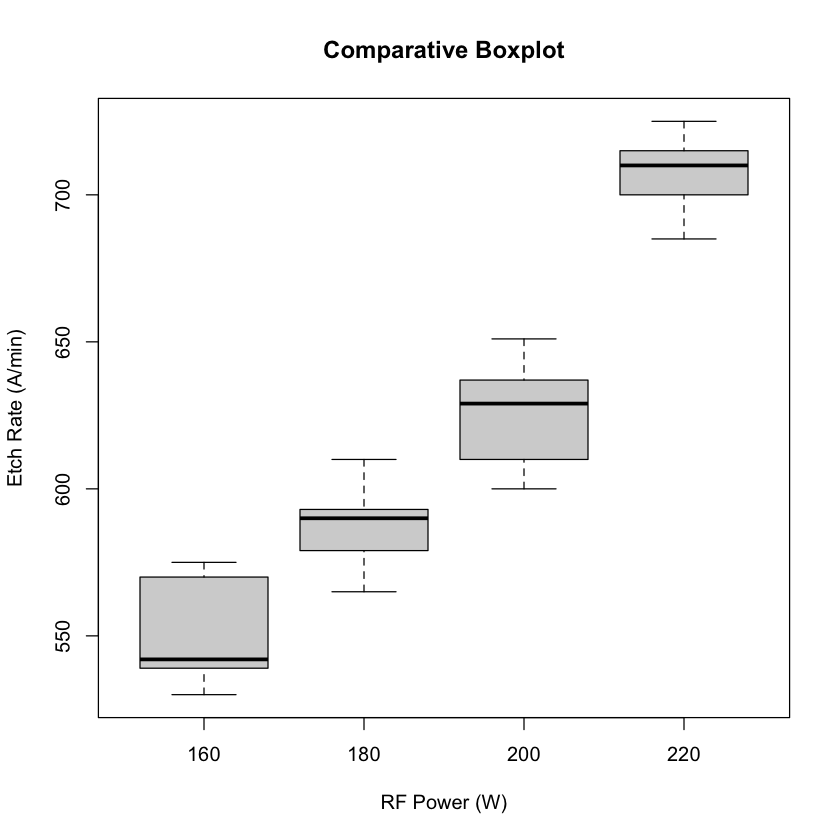

In [90]:
# Syntax corresponds to CSV
boxplot(Etch.Rate ~ RF.Power, data=dataset, 
        main="Comparative Boxplot",
        xlab="RF Power (W)",
        ylab="Etch Rate (A/min)")

Install package and import library for tabulation

In [71]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/4.1/site-library’
(as ‘lib’ is unspecified)



In [86]:
library(dplyr)

Display table to get a sense of the data

In [67]:
dataset_tbl <- dataset %>% group_by(RF.Power) %>% summarise(Etch.Rates=paste0(Etch.Rate, collapse=" , "), Totals=sum(Etch.Rate), Averages=mean(Etch.Rate))
dataset_tbl

RF.Power,Etch.Rates,Totals,Averages
<fct>,<chr>,<int>,<dbl>
160,"575 , 542 , 530 , 539 , 570",2756,551.2
180,"565 , 593 , 590 , 579 , 610",2937,587.4
200,"600 , 651 , 610 , 637 , 629",3127,625.4
220,"725 , 700 , 715 , 685 , 710",3535,707.0


Display total sum

In [92]:
sum(dataset_tbl$Totals)

[1] 12355

Display total averages

In [93]:
mean(dataset_tbl$Averages)

[1] 617.75

Calculate the ANOVA and obtain the F-value, p-values and sum squared errors (SSE).

In [87]:
anova <- aov(Etch.Rate ~ RF.Power, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
RF.Power     3  66871   22290    66.8 2.88e-09 ***
Residuals   16   5339     334                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Display `95%` CI levels for each factor

In [70]:
confint(anova, level=0.95)

,2.5 %,97.5 %
(Intercept),533.88153,568.51847
RF.Power180,11.70798,60.69202
RF.Power200,49.70798,98.69202
RF.Power220,131.30798,180.29202


Display the Residual Diagnostic Plots

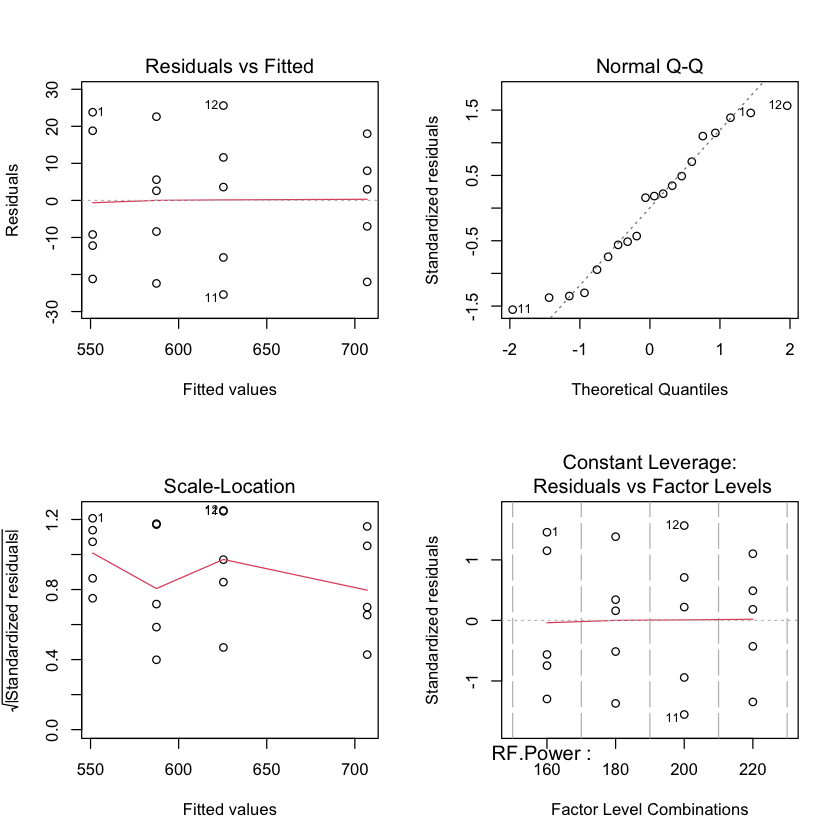

In [33]:
par(mfrow=c(2,2))
plot(anova)

To illustrate $y_{ij} = \mu + \tau_i + \epsilon_{ij}$.

In [156]:
yi <- data.frame(Etch.Rate=(dataset %>% filter(RF.Power == 160))$Etch.Rate)
yi$Mean <- rep(mean(yi$Etch.Rate), times=nrow(yi))
yi$Effect <- yi$Mean - mean(dataset$Etch.Rate)
yi$Error <- yi$Etch.Rate - yi$Effect - yi$Mean
yi$Computed <- yi$Mean + yi$Effect + yi$Error
yi

Etch.Rate,Mean,Effect,Error,Computed
<int>,<dbl>,<dbl>,<dbl>,<dbl>
575,551.2,-66.55,90.35,575
542,551.2,-66.55,57.35,542
530,551.2,-66.55,45.35,530
539,551.2,-66.55,54.35,539
570,551.2,-66.55,85.35,570


Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. Conclusion. We reject the null hypothesis as p-value < `0.05` (alpha level), indicating that there is insufficient evidence that all the factor means are equal.

Therefore, there is sufficient evidence that "Power" does affect the "Etch Rate". This can be evidently seen from the progressively increasing rates from `160` to `220`.

## The Plasma Etching Experiment (Extended)

This uses the same dataset to demonstrate non-parametric distributions such as the **Krusal-Wallis test**.

Calculate the ANOVA using Krusal-Wallis test.

In [47]:
anova <- kruskal.test(Etch.Rate ~ RF.Power, data=dataset)
anova


	Kruskal-Wallis rank sum test

data:  Etch.Rate by RF.Power
Kruskal-Wallis chi-squared = 16.907, df = 3, p-value = 0.0007386


This gives us a test statistic of `16.91` with `3` df and a p-value < `0.001` (alpha level). This result doesn’t refute our preliminary conclusion using the classical ANOVA Model.

## Fabric Strength Experiment

This experiment aims to give a sense of **random effects model**. Suppose a cloth factory would like to know how consistent is the strength of its fabric across `4` of its looms (that weaves the fabric).

(This is an example of repeated measures)

Firstly, import the data.

In [1]:
dataset <- read.csv("fabric_strength.csv")

The factor we are controlling is the loom,

In [2]:
dataset$Loom <- factor(dataset$Loom)

Install package and import library for calculation

In [74]:
install.packages('lme4')

Installing package into ‘/usr/local/lib/R/4.1/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’




In [3]:
library(lme4)

Loading required package: Matrix



Display boxplot for data

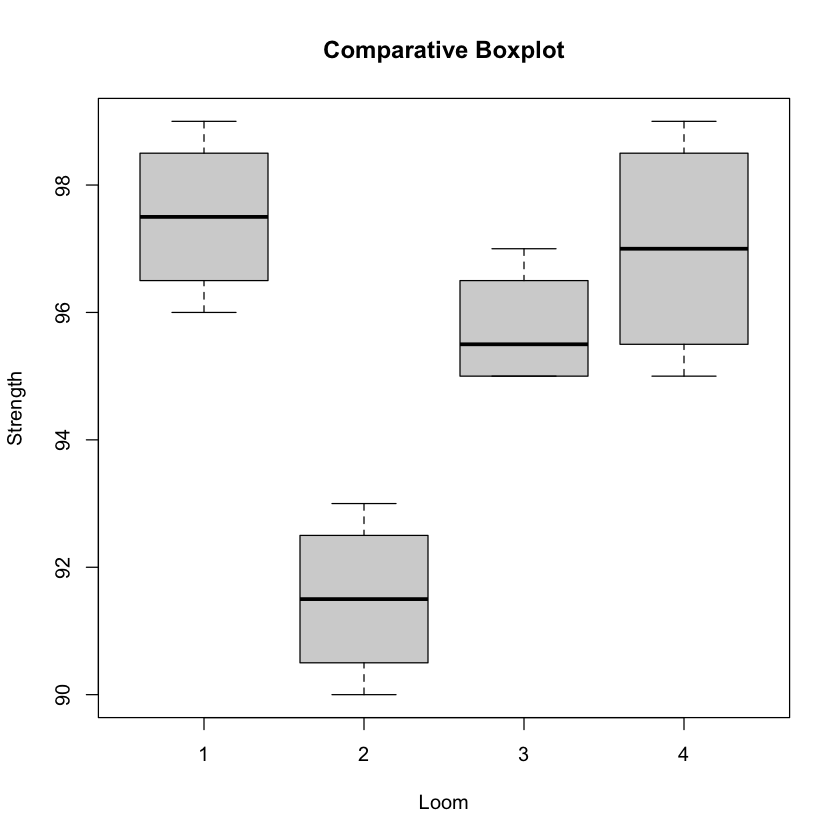

In [5]:
boxplot(Strength ~ Loom, data=dataset, 
        main="Comparative Boxplot",
        xlab="Loom",
        ylab="Strength")

Display table to visualise data

In [162]:
dataset_tbl <- dataset %>% group_by(Loom) %>% summarise(Strengths=paste0(Strength, collapse=" , "), Totals=sum(Strength))
dataset_tbl

Loom,Strengths,Totals
<fct>,<chr>,<int>
1,"98 , 97 , 99 , 96",390
2,"91 , 90 , 93 , 92",366
3,"96 , 95 , 97 , 95",383
4,"95 , 96 , 99 , 98",388


In [6]:
var(c((390 / 4), (366 / 4), (383 / 4), (388 / 4)))

[1] 7.432292

Display total sum

In [82]:
sum(dataset_tbl$Totals)

[1] 1527

Calculate the ANOVA and obtain the F-value, p-values and sum squared errors (SSE).

In [39]:
# Use Error(Loom) to display errors only
anova <- aov(Strength ~ Loom, data=dataset)
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Loom         3  89.19  29.729   15.68 0.000188 ***
Residuals   12  22.75   1.896                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

From the result, we can see that $MS_E = 1.896$ and $MS_{Treatments} = 29.729$.

In [63]:
mse <- 1.896
mst <- 29.729

Obtain variance component due to treatments and observations for $y_{ij}$,

$SS_{Total} \times \frac{1}{n-1} = (SS_{Treatment} + SS_{Error}) \times \frac{1}{n-1}$

This can be done using,

$\large{\frac{(\sigma_{\tau}^2 \times df_{\sigma_{\tau}}) + (\sigma^2 \times df_{\sigma})}{n - 1}}$

In [67]:
treatment_var = (mst * 3) / (nrow(dataset) - 1)
treatment_var

[1] 5.9458

In [68]:
error_var = (mse * 12) / (nrow(dataset) - 1)
error_var

[1] 1.5168

In [69]:
y_var = treatment_var + error_var
y_var

[1] 7.4626

This can be verified too using the R function,

In [71]:
var(dataset$Strength)

[1] 7.4625

Using another library to obtain result

In [113]:
anova_alt <- lmer(Strength ~ 1 + (1 | Loom), data=dataset)
summary(anova_alt)

Linear mixed model fit by REML ['lmerMod']
Formula: Strength ~ 1 + (1 | Loom)
   Data: dataset

REML criterion at convergence: 63.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.38018 -0.57260 -0.04342  0.82574  1.52491 

Random effects:
 Groups   Name        Variance Std.Dev.
 Loom     (Intercept) 6.958    2.638   
 Residual             1.896    1.377   
Number of obs: 16, groups:  Loom, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept)   95.438      1.363   70.01

Hypothesis: $H_0: \sigma_{\tau}^2 = 0, H_1: \sigma_{\tau}^2 > 0$. Conclusion. We reject the null hypothesis as p-value < `0.05` (alpha level), therefore there is insufficient evidence that the fabric produced is consistent across all looms.

# Formative quiz

(Source: Chew Chee Hua. "Basic Statistical Methods in Experimental Design")

## Question 1

An experimenter has conducted a single-variable experiment with six levels of the variable, and each variable level has been replicated three times. The computed value of the F-statistic is `5.81`. What is the P-value?

### Answer

We can see that $k = 6$ (factors) and $n = 6 \times 3$ (number of observations).

Hence making,

$df_w = k - 1 = 5$

$df_b = n - k = 12$

In [197]:
# It reads from left to right, so setting to false gives us the area starting from the right (upper-tail),
#   because we want to get the rejection value.
# Notation: df1 = factor df and df2 = errors df
pf(5.81, df1=5, df2=12, lower.tail=FALSE)

[1] 0.005941688

## Question 2

An article in Bioelectromagnetics (“Electromagnetic Effects on Forearm Disuse Osteopenia: A Randomised, Double-Blind, Sham-Controlled Study,” Vol. 32, 2011, pp.273-282) describes a randomised, double-blind, sham-controlled, feasibility and dosing study to determine if a common pulsing electromagnetic field (PEMF) treatment could moderate the substantial osteopenia that occurs after forearm disuse. 

Subjects were randomised into 4 groups after a distal radius fracture, or carpal surgery requiring immobilisation in a cast. 

Sham or PEMF transducers were worn on a distal forearm for `1`, `2`, or `4`h/day for `8`weeks starting after cast removal (“baseline”) when bone density continues to decline. 

Bone mineral density (BMD) and bone geometry were measured in the distal forearm by dual energy X-ray absorptiometry (DXA) and peripheral quantitative computed tomography (pQCT). 

The data (see `bmd_measurements.csv`) are the percent losses in BMD measurements on the radius after `16`weeks for patients wearing the active or sham PEMF transducers for `1`, `2`, or `4`h/day (data were constructed to match the means and standard deviations read from a graph in the paper).

Is there evidence to support a claim that PEMF usage affects BMD loss?

## Question 3

The following are residual plots of the analysis in Question 2 above from a software. Comment on the underlying assumptions and model adequacy.

### Answer

In [268]:
dataset <- read.csv("bmd_measurements.csv")
dataset

# Preprocess dataset to "Treatment" and "BMT". 
dataset <- rbind(merge(c("Sham"), dataset$Sham), 
                 merge(c("PEMF.1h.day"), dataset$PEMF.1h.day), 
                 merge(c("PEMF.2h.day"), dataset$PEMF.2h.day),
                 merge(c("PEMF.4h.day"), dataset$PEMF.4h.day))

colnames(dataset) <- c("Treatment", "BMD")

# Set PEMF transducer level as the factor we want to determine relationship from.
dataset$Treatment <- factor(dataset$Treatment)

# Get ANOVA result
anova <- aov(BMD ~ Treatment, data=dataset)
summary(anova)

Sham,PEMF.1h.day,PEMF.2h.day,PEMF.4h.day
<dbl>,<dbl>,<dbl>,<dbl>
4.51,5.32,4.73,7.03
7.95,6.00,5.81,4.65
4.97,5.12,5.69,6.65
3.00,7.08,3.86,5.49
7.97,5.48,4.06,6.98
2.23,6.52,6.56,4.85
3.95,4.09,8.34,7.26
5.64,6.28,3.01,5.92
9.35,7.77,6.71,5.58


            Df Sum Sq Mean Sq F value Pr(>F)
Treatment    3  10.04   3.346   1.297  0.282
Residuals   76 196.04   2.579               

Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. Conclusion: We accept the null hypothesis as the p-value > `0.05` (alpha level), therefore there is insufficient evidence to support the claim that PEMF usage affects BMD loss.

Below are the residual plots,

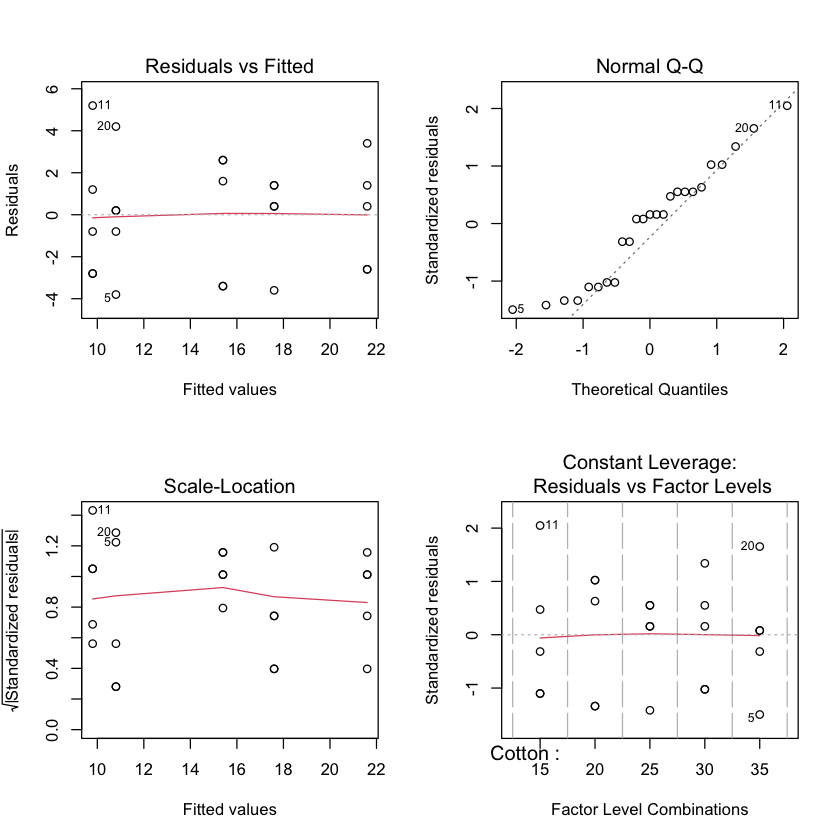

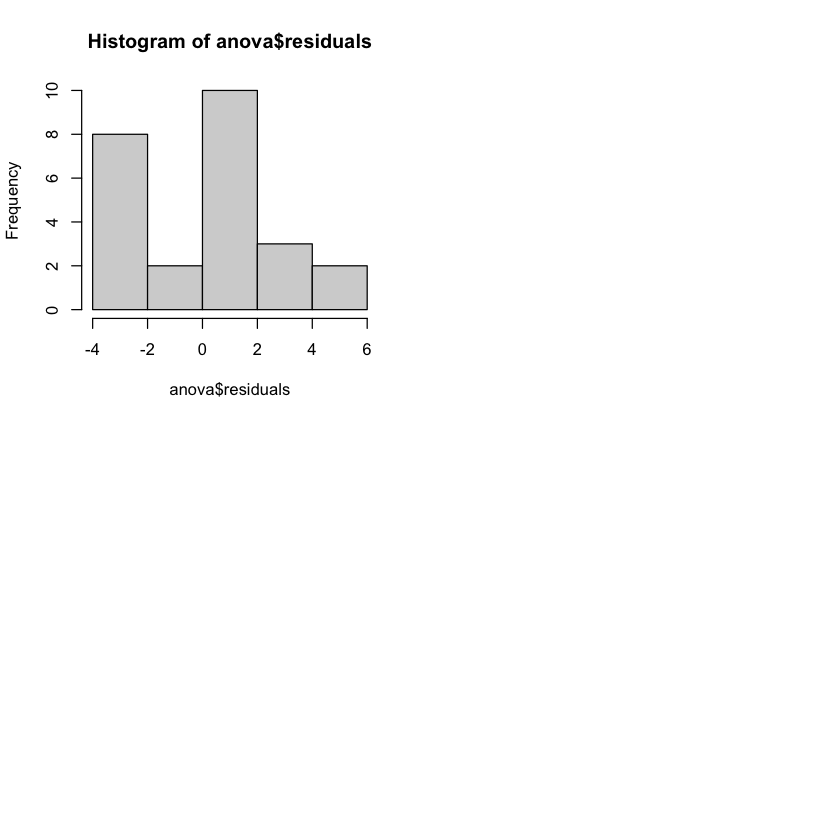

In [305]:
par(mfrow=c(2,2))
plot(anova)
hist(anova$residuals)

The model is adequate and there is insufficient evidence to question linear model assumption and error normality, independence and constant variance assumptions.

See linear regression line on the residuals. [Read more here](https://people.duke.edu/~rnau/testing.htm) for interpretation.

This slightly 

## Question 4

An article appeared in The Wall Street Journal on Tuesday, April 27, 2010, with the title "Eating Chocolate Is Linked to Depression." 

The article reported on a study funded by the National Heart, Lung and Blood Institute (part of the National Institutes of Health) and conducted by the faculty at the University of California, San Diego, and the University of California, Davis.

The research was also published in the Archives of Internal Medicine (2010, pp.699-703). 

The study examined `931` adults who were not taking antidepressants and did not have known cardiovascular disease or diabetes. 

The group was about `70%` men and the average age of the group was reported to be about `58`. 

The participants were asked about chocolate consumption and then screened for depression using a questionnaire. 

People who scored less than `16` on the questionnaire are not considered depressed, while those with scores above `16` and less than or equal to `22` are considered possibly depressed, while those with scores above `22` are considered likely to be depressed.

The survey found that people who were not depressed ate an average of `8.4` servings of chocolate per month, while those individuals who scored above `22` were likely to be depressed ate the most chocolate, an average of `11.8` servings per month. No differentiation was made between dark and milk chocolate. 

Other foods were also examined, but no pattern emerged between other foods and depression.

1. Is this study really a designed experiment?
2. Does it establish a cause-and-effect link between chocolate consumption and depression?
3. How would the study have to be conducted to establish such a link?

### Answer

To summarise based on the above information,

| Gender | % of Population | Average Age |
| -- | -- | -- |
| M | 0.7 | 58 |
| F | 0.3 | ? |

The results are as follows (note the chocolate amount were not controlled),

| Range | Label | Chocolate servings |
| -- | -- | -- |
| `< 16` | Not Depressed | 8.4 |
| `16 <=` and `<= 22` | Considerably Depressed | ? |
| `> 22` | Depressed | 11.8 |

From [Wikipedia](https://en.wikipedia.org/wiki/Design_of_experiments),

> The **design of experiments** (DOE, DOX, or experimental design) is the design of any task that aims to describe and explain the variation of information under conditions that are hypothesized to reflect the variation

1. This is not a designed experiment since conditions such the servings of chocolate and differentiation between dark and milk chocolate are not controlled.

2. This does not establish any cause-and-effect link between chocolate and depression.
   1. There is missing servings in the "Considerably Depressed" case which may not show a link.
   2. The subjects could have depressive tendencies (slight depression but not enough to quantify) before the experiment. 
   
3. The experiment could be run by giving a group of people a defined amount of chocolate servings per month for serveral months, while not giving another group any chocolate. Ideally, it would be good to have the participants not eat any chocolate for a period of time before the experiment, and measure the depression levels for each participants before and after the experiment to see the cause-and-effect relationship.

## Question 5

A product developer is investigating the tensile strength of a new synthetic fibre that will be used to make cloth for men’s shirts. Strength is normally affected by the percentage of cotton used in the blend of materials for the fibre. The engineer conducts a completely randomised experiment with `5` levels of cotton content and replicated the experiment `5` times. The data are displayed in the following table (see `tensile.csv`).

Is there evidence to support the claim that cotton content affects the mean tensile strength?

## Question 6

The following are residual plots of the analysis in Question 5 above from a software. Comment on the underlying assumptions and model adequacy.

### Answer

In [3]:
dataset <- read.csv("tensile.csv")
dataset

# Flatten table
df_1 <- dataset %>% group_by(Cotton.Weight.Percentage) %>% select(Cotton.Weight.Percentage, Obs.1)
colnames(df_1) <- c("Cotton", "Strength")

df_2 <- dataset %>% group_by(Cotton.Weight.Percentage) %>% select(Cotton.Weight.Percentage, Obs.2)
colnames(df_2) <- c("Cotton", "Strength")

df_3 <- dataset %>% group_by(Cotton.Weight.Percentage) %>% select(Cotton.Weight.Percentage, Obs.3)
colnames(df_3) <- c("Cotton", "Strength")

df_4 <- dataset %>% group_by(Cotton.Weight.Percentage) %>% select(Cotton.Weight.Percentage, Obs.4)
colnames(df_4) <- c("Cotton", "Strength")

df_5 <- dataset %>% group_by(Cotton.Weight.Percentage) %>% select(Cotton.Weight.Percentage, Obs.5)
colnames(df_5) <- c("Cotton", "Strength")

dataset <- rbind(df_1, df_2, df_3, df_4, df_5)

# Set the factor to cotton weight percentage as it the controllable factor.
dataset$Cotton <- factor(dataset$Cotton)

# Get ANOVA result
anova <- aov(Strength ~ Cotton, data=dataset)
summary(anova)

Cotton.Weight.Percentage,Obs.1,Obs.2,Obs.3,Obs.4,Obs.5
<int>,<int>,<int>,<int>,<int>,<int>
15,7,7,15,11,9
20,12,17,12,18,18
25,14,19,19,18,18
30,19,25,22,19,23
35,7,10,11,15,11


            Df Sum Sq Mean Sq F value   Pr(>F)    
Cotton       4  475.8  118.94   14.76 9.13e-06 ***
Residuals   20  161.2    8.06                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. Conclusion: We reject the null hypothesis as the p-value < `0.05` (alpha level), therefore there is sufficient evidence to support the claim that cotton content affects the mean tensile strength.

Remember that the F-distribution is the probability of the null hypothesis $H_0$ of occurring.

Below are the residual plots,

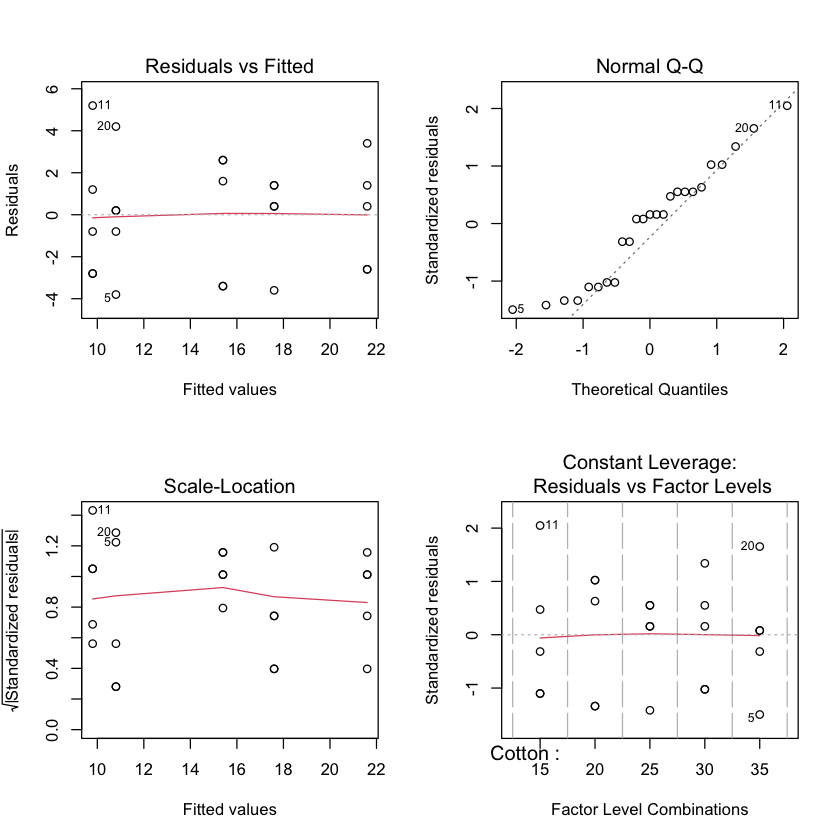

In [304]:
par(mfrow=c(2,2))
plot(anova)

The model is adequate, and there is insufficient evidence to question linear model assumption and error normality, independence and constant variance assumptions.

> **So when does it becomes inadequate?**
>
> It becomes inadequate when you notice the data points scatter everywhere or does not follow the linear trend.

## Question 7

A regional company has tried three approaches to solicit donations from `24` potential sponsors. 

The `24` potential sponsors were randomly divided into `3` groups of `8`, and `1` approach was used for each group. 

The dollar amounts of the resulting contributions are displayed in the following table.

Do the data (see `donation.csv`) indicate that there is a difference in results obtained from the `3` different approaches?

## Question 8

The following are residual plots of the analysis in Question 7 above from a software. Comment on the underlying assumptions and model adequacy.

In [313]:
dataset <- read.csv("donation.csv")

# Display this
dataset_tbl <- dataset %>% group_by(Approach) %>% summarise(Donations=paste0(Donation, collapse=" , "))
dataset_tbl

# Set the factor as the approach to determine which approach yields best result, as it is the controllable factor.
dataset$Approach <- factor(dataset$Approach)

# Get ANOVA result
anova <- aov(Donation ~ Approach, data=dataset)
summary(anova)

Approach,Donations
<chr>,<chr>
A1,"1000 , 1500 , 1200 , 1800 , 1600 , 1100 , 1000 , 1250"
A2,"1500 , 1800 , 2000 , 1200 , 2000 , 1700 , 1800 , 1900"
A3,"900 , 1000 , 1200 , 1500 , 1200 , 1550 , 1000 , 1100"


            Df  Sum Sq Mean Sq F value  Pr(>F)   
Approach     2 1362708  681354    9.41 0.00121 **
Residuals   21 1520625   72411                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Hypothesis: $H_0: \tau_1 = \tau_2 = ... = \tau_a = 0, H_1: \tau_i \neq 0\ \ \exists i$. Conclusion: We reject the null hypothesis as the p-value < `0.05` (alpha level), therefore there is sufficient evidence that indicates  a difference in results obtained from the `3` different approaches.

Below are the residual plots,

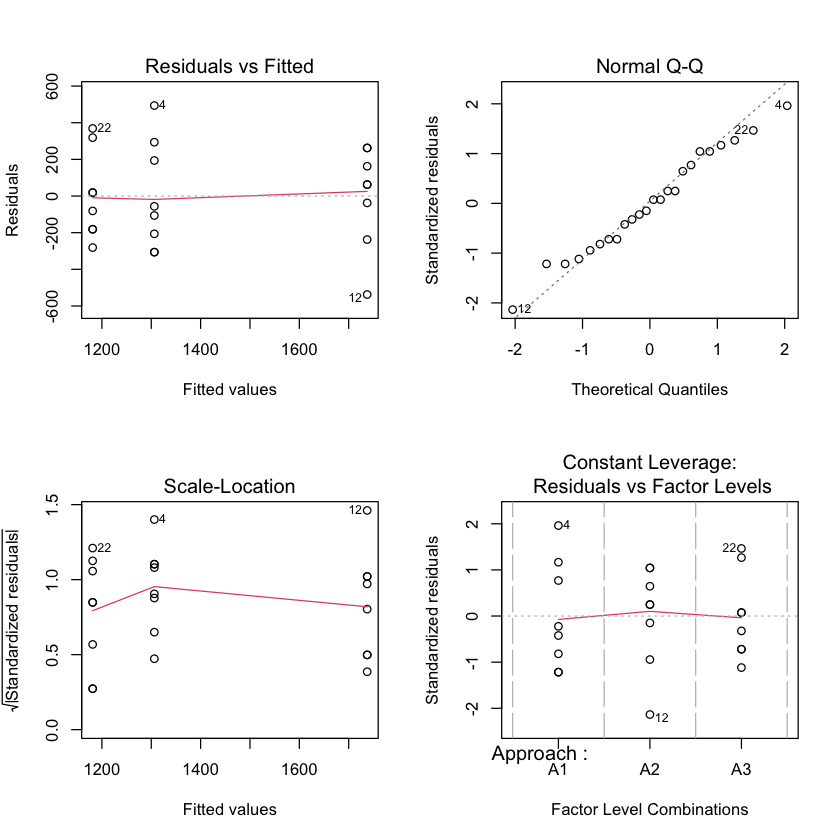

In [308]:
par(mfrow=c(2,2))
plot(anova)

The model is adequate, and there is insufficient evidence to question linear model assumption and error normality, independence and constant variance assumptions.

# Calculating ANOVA

## [One-Way ANOVA](https://www.statology.org/one-way-anova-by-hand/)

For example with given dataset (in here the group is the factor),

In [4]:
dataset <- data.frame(Group.1=c(85,86,88,75,78,94,98,79,71,80),
                      Group.2=c(91,92,93,85,87,84,82,88,95,96),
                      Group.3=c(79,78,88,94,92,85,83,85,82,81))
t(dataset)

Group.1,85,86,88,75,78,94,98,79,71,80
Group.2,91,92,93,85,87,84,82,88,95,96
Group.3,79,78,88,94,92,85,83,85,82,81


The first step is to calculate the group means and overall means.

In [24]:
means = data.frame(Group.1=mean(dataset$Group.1), 
                   Group.2=mean(dataset$Group.2), 
                   Group.3=mean(dataset$Group.3),
                   Total=(mean(dataset$Group.1) + mean(dataset$Group.2) + mean(dataset$Group.3)) / 3)
means

Group.1,Group.2,Group.3,Total
<dbl>,<dbl>,<dbl>,<dbl>
83.4,89.3,84.7,85.8


Next, we calculate the $SS_{Treatments}$,

In [28]:
SSTreatments = nrow(dataset) * ((means$Group.1 - means$Total)**2 + (means$Group.2 - means$Total)**2 + (means$Group.3 - means$Total)**2)
SSTreatments

[1] 192.2

Calculate the $SS_E$,

In [29]:
SSE = sum((dataset$Group.1 - means$Group.1) ** 2) + sum((dataset$Group.2 - means$Group.2) ** 2) + sum((dataset$Group.3 - means$Group.3) ** 2)
SSE

[1] 1100.6

Then finally the $SS_T$ becomes,

In [31]:
SST = SSTreatments + SSE
SST

[1] 1292.8

Given that we have $a = 3$ and $N = 3(10)$, then $df_{w} = 3(10) - 3 = 27$, $df_{b} = 3 - 1 = 2$, $df_{total} = 3(10) - 1 = 29.

This gives us the following overview,

In [36]:
data.frame(Source=c("Group", "Error", "Total"),
           SS=c(SSTreatments, SSE, SST),
           DF=c(2, 27, 29),
           MS=c(SSTreatments / 2, SSE / 27, SST / 29))

Source,SS,DF,MS
<chr>,<dbl>,<dbl>,<dbl>
Group,192.2,2,96.10000
Error,1100.6,27,40.76296
Total,1292.8,29,44.57931


And the treatments F-value,

In [110]:
F = (SSTreatments / 2) / (SSE / 27)
F

[1] 8.526316

In [111]:
pf(F, df1=2, df2=27, lower.tail=FALSE)

[1] 0.001348313

You can see why it is an _**Analysis of Variance**_, since it is an analysis of variance in between groups and between groups.

## [Two-Way ANOVA](https://analyticsbuddhu.wordpress.com/2016/07/30/two-way-anova-calculation-by-hand-analysis-of-variance/)

For example with given dataset, we have 2 factors - temperature and drink type,

In [115]:
cold_mt <- c(4,5,6,5)
cold_c <- c(6,6,4,4)
warm_mt <- c(7,9,8,12)
warm_c <- c(13, 15, 12, 12)
hot_mt <- c(10, 12, 11, 9)
hot_c <- c(12, 13, 10, 13)

data.frame(Drink=c("Milk Tea", "Chocolate"),
           Cold=c(paste0(cold_mt, collapse=" , "), paste0(cold_c, collapse=" , ")),
           Warm=c(paste0(warm_mt, collapse=" , "), paste0(warm_c, collapse=" , ")),
           Hot=c(paste0(hot_mt, collapse=" , "), paste0(hot_c, collapse=" , ")))

Drink,Cold,Warm,Hot
<chr>,<chr>,<chr>,<chr>
Milk Tea,"4 , 5 , 6 , 5","7 , 9 , 8 , 12","10 , 12 , 11 , 9"
Chocolate,"6 , 6 , 4 , 4","13 , 15 , 12 , 12","12 , 13 , 10 , 13"


Calculations for $Y_{ij}$ means,

In [94]:
mean_cold_mt = round(mean(cold_mt))
mean_cold_c = round(mean(cold_c))
mean_warm_mt = round(mean(warm_mt))
mean_warm_c = round(mean(warm_c))
mean_hot_mt = round(mean(hot_mt))
mean_hot_c = round(mean(hot_c))

data.frame(Drink=c("Milk Tea", "Chocolate"),
           Cold=c(mean_cold_mt, mean_cold_c),
           Warm=c(mean_warm_mt, mean_warm_c),
           Hot=c(mean_hot_mt, mean_hot_c))

Drink,Cold,Warm,Hot
<chr>,<dbl>,<dbl>,<dbl>
Milk Tea,5,9,10
Chocolate,5,13,12


Calculations for $Y_i$ means,

In [95]:
mean_mt = round(mean(c(mean_cold_mt, mean_warm_mt, mean_hot_mt)))
mean_c = round(mean(c(mean_cold_c, mean_warm_c, mean_hot_c)))
mean_total = round(mean(c(mean_mt, mean_c)))

data.frame(Milk.Tea=mean_mt, Chocolate=mean_c, Total=mean_total)

Milk.Tea,Chocolate,Total
<dbl>,<dbl>,<dbl>
8,10,9


Calculations for $Y_j$ means,

In [96]:
mean_cold = round(mean(c(mean_cold_mt, mean_cold_c)))
mean_warm = round(mean(c(mean_warm_mt, mean_warm_c)))
mean_hot = round(mean(c(mean_hot_mt, mean_hot_c)))

# Notice the total is the same
data.frame(Cold=mean_cold, Warm=mean_warm, Hot=mean_hot, Total=mean(c(mean_cold, mean_warm, mean_hot)))

Cold,Warm,Hot,Total
<dbl>,<dbl>,<dbl>,<dbl>
5,11,11,9


Calculating the $SS_E$ and $SS_{Treatments}$,

In [103]:
SSE = sum((cold_mt - mean_cold_mt) ** 2) + sum((cold_c - mean_cold_c) ** 2) +
      sum((warm_mt - mean_warm_mt) ** 2) + sum((warm_c - mean_warm_c) ** 2) +
      sum((hot_mt - mean_hot_mt) ** 2) + sum((hot_c - mean_hot_c) ** 2)
SSE

[1] 38

In [104]:
SSTreatments = 4 * 3*((mean_mt - mean_total) ** 2 + (mean_c - mean_total) ** 2)
SSTreatments

[1] 24

Calculating the $df_w = (r - 1) \times a \times b$ and $MS_E$,

In [105]:
df_w = (4 - 1) * 2 * 3
df_w

[1] 18

In [106]:
MSE = SSE / df_w
MSE

[1] 2.111111

Calculating the $df_b = (a-1)\times(b-1)$ and $MS_{Treatments}$,

In [107]:
df_b = (2 - 1)*(3 - 1)
df_b

[1] 2

In [108]:
MSTreatments = SSTreatments / df_b
MSTreatments

[1] 12

This gives us the following F-value,

In [113]:
F = MSTreatments / MSE
F

[1] 5.684211

In [114]:
pf(F, df1=df_b, df2=df_w, lower.tail=FALSE)

[1] 0.0122047